# Model `ELBMFPyTorch`

The PyTorch implementation by the author.

In [6]:
# use project files rather than the installed PyBMF
 
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

from PyBMF.models.ELBMFPyTorch import ELBMF
from PyBMF.utils import show_matrix

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

c:\Users\nieht\miniconda3\envs\pybmf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load `CustomData`

<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
C:\Users\nieht\AppData\Local\Temp\ipykernel_22372\997874985.py:6: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep='\t')


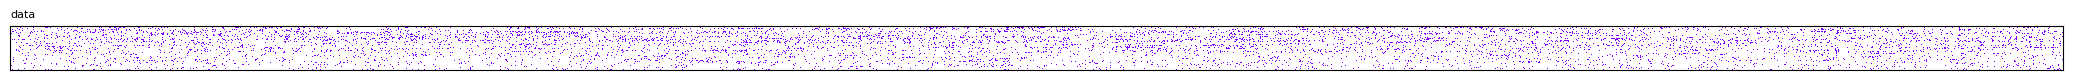

Using custom data of shape: (644, 30243), type: <class 'scipy.sparse._csr.csr_matrix'>
[I] Sampling axis 1 to size 1000
[I]   sampling seed: 1000
[I]   sampling from: (644, 30243)
[I]   sampling to  : (644, 1000)


<Figure size 640x480 with 0 Axes>

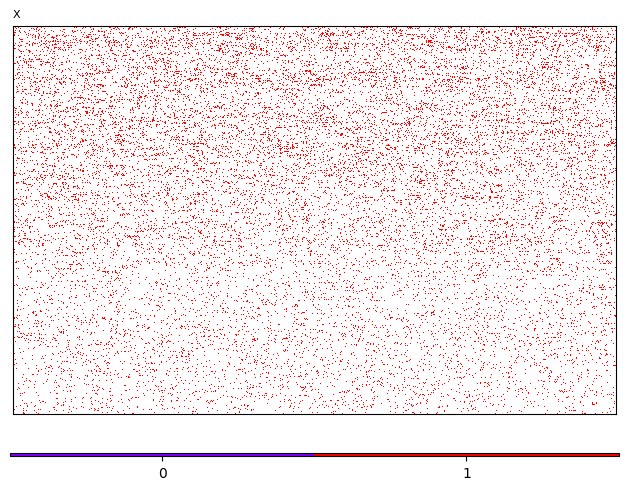

<Figure size 640x480 with 0 Axes>

In [2]:
# loading real-world data from datasets of ELBMF-Julia
# download and extract .tsv file from https://eda.rg.cispa.io/prj/elbmf/

# make sure the data is correctly parsed

df = pd.read_csv('D:\PyBMF-bulky\data\data-elbmf\Brain_Cerebellum-z.tsv', header=None, sep='\t')

X = csr_matrix(df.astype(pd.SparseDtype("float64", 0)).sparse.to_coo())
show_matrix([(X, [0, 0], 'data')])

# wrap it with CustomData(), and crop the data if needed

from PyBMF.datasets import CustomData

data = CustomData(X, name="Brain_Cerebellum-z")
data.load(overwrite_cache=True)

data.sample(factor_id=1, n_samples=1000, seed=1000)
data.show_matrix(scaling=0.25)

# Load synthetic data

In [3]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

# Load `MovieLensData`

In [4]:
# # loading real-world data

# from PyBMF.datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

# data.show_matrix(scaling=0.5)

# Split and negative sampling

Here `NoSplit` is used, which means `X_train`, `X_val` and `X_test` point to the same data `data.X`.

With `split.negative_sample`, zeros are added to the sparse matrix. The number of zeros is set to be equal to the number of ones, which is `split.pos_size`.

In [5]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1724480349
[I]   train_size   : 53079
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1724480349
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 590921
[I]   n_negatives  : 53079
[I]   train_size   : 53079
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


# `ELBMFPyTorch`

`ELBMFPyTorch` is a wrapper of the PyTorch implementation from the author of the ELBMF paper.

This is experimental and will be removed in the future. The final version of the model will be `models/ELBMF.py`.

[I] k            : 100
[I] U            : None
[I] V            : None
[I] init_method  : uniform
[I] reg_l1       : 0.01
[I] reg_l2       : 0.02
[I] reg_growth   : 1.0002
[I] max_iter     : 1000
[I] min_diff     : 1e-08
[I] beta         : 0
[I] seed         : 1724480350
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-24 14-19-10-184816 ELBMF
[I] U, V existed. Skipping initialization.

================ inspect parameters ================
X:  torch.Size([644, 1000]) <class 'torch.Tensor'>
n_components:  100
U:  (644, 100) <class 'numpy.ndarray'>
V:  (1000, 100) <class 'numpy.ndarray'>
l1reg:  0.01
l2reg:  0.02
regularization_rate:  <function ELBMF._fit.<locals>.<lambda> at 0x00000270C8001E40>
maxiter:  1000
tolerance:  1e-08
beta:  0
callback:  None
with_rounding:  False
seed:  1724480350



[I] error: 34591.5430, U: [0.0000, 3.3651], V: [0.0000, 0.7607]: 100%|██████████| 1000/1000 [02:30<00:00,  6.66it/s]


[I] time elapsed :  2m30s
[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] model saved as: 2024-08-24 14-19-10-184816 ELBMF.pickle


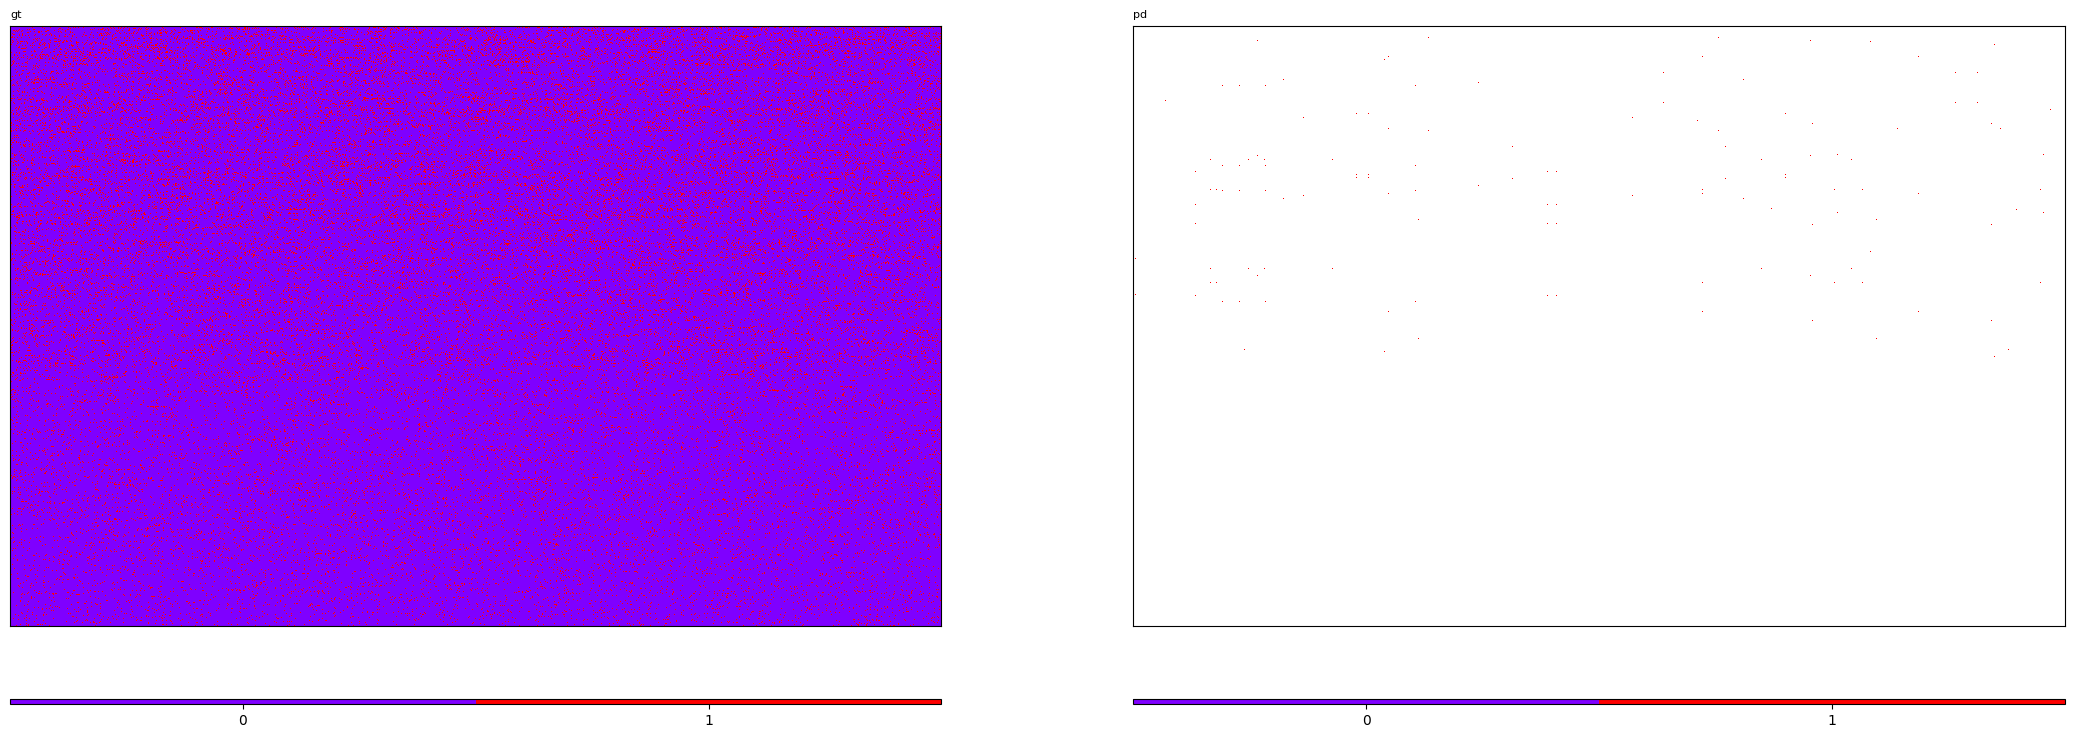

train          
                                                        0          
                  time iter                   F      RMSE       MAE
0    24/08/24 02:19:10    0  tensor(47990.6172)  0.272982  0.150043
1    24/08/24 02:19:10    1  tensor(47911.7148)  0.272758  0.149009
2    24/08/24 02:19:11    2  tensor(47839.1133)  0.272552  0.148756
3    24/08/24 02:19:11    3  tensor(47757.8203)  0.272320  0.148746
4    24/08/24 02:19:11    4  tensor(47664.1523)  0.272053  0.148819
5    24/08/24 02:19:11    5  tensor(47556.1914)  0.271745  0.148938
6    24/08/24 02:19:11    6  tensor(47432.4414)  0.271391  0.149094
7    24/08/24 02:19:12    7  tensor(47292.7617)  0.270991  0.149284
8    24/08/24 02:19:12    8  tensor(47137.5273)  0.270546  0.149509
9    24/08/24 02:19:12    9  tensor(46967.3125)  0.270057  0.149767
10   24/08/24 02:19:12   10  tensor(46783.4414)  0.269528  0.150056
11   24/08/24 02:19:12   11  tensor(46587.8008)  0.268963  0.150369
12   24/08/24 02:19:13   12  tensor(46382.5898)  0.268370  0.150697
13   24/08/24 02:19:13   13  tensor(46168.9961)  0.267752  0.151028
14   24/08/24 02:19:13   14  tensor(45949.3086)  0.267114  0.151360
15   24/08/24 02:19:13   15  tensor(45725.9531)  0.266464  0.151693
16   24/08/24 02:19:13   16  tensor(45500.9141)  0.265807  0.152013
17   24/08/24 02:19:13   17  tensor(45275.3555)  0.265148  0.152309
18   24/08/24 02:19:14   18  tensor(45051.2812)  0.264491  0.152585
19   24/08/24 02:19:14   19  tensor(44829.5703)  0.263839  0.152833
20   24/08/24 02:19:14   20  tensor(44612.2383)  0.263199  0.153057
21   24/08/24 02:19:14   21  tensor(44399.6406)  0.262571  0.153241
22   24/08/24 02:19:14   22  tensor(44192.1523)  0.261957  0.153390
23   24/08/24 02:19:14   23  tensor(43990.7305)  0.261359  0.153516
24   24/08/24 02:19:15   24  tensor(43796.2383)  0.260781  0.153620
25   24/08/24 02:19:15   25  tensor(43608.9961)  0.260222  0.153698
26   24/08/24 02:19:15   26  tensor(43428.8477)  0.259684  0.153750
27   24/08/24 02:19:15   27  tensor(43256.2812)  0.259168  0.153782
28   24/08/24 02:19:15   28  tensor(43090.7930)  0.258672  0.153782
29   24/08/24 02:19:15   29  tensor(42932.0547)  0.258195  0.153757
30   24/08/24 02:19:15   30  tensor(42780.2891)  0.257738  0.153712
31   24/08/24 02:19:16   31  tensor(42635.4688)  0.257302  0.153653
32   24/08/24 02:19:16   32  tensor(42497.3281)  0.256885  0.153583
33   24/08/24 02:19:16   33  tensor(42365.6133)  0.256487  0.153501
34   24/08/24 02:19:16   34  tensor(42240.2422)  0.256107  0.153406
35   24/08/24 02:19:16   35  tensor(42120.4453)  0.255743  0.153296
36   24/08/24 02:19:16   36  tensor(42006.4141)  0.255397  0.153180
37   24/08/24 02:19:17   37  tensor(41897.5273)  0.255065  0.153054
38   24/08/24 02:19:17   38  tensor(41793.4805)  0.254749  0.152923
39   24/08/24 02:19:17   39  tensor(41694.3984)  0.254446  0.152784
40   24/08/24 02:19:17   40  tensor(41599.5586)  0.254157  0.152641
41   24/08/24 02:19:17   41  tensor(41509.0156)  0.253881  0.152496
42   24/08/24 02:19:17   42  tensor(41422.2695)  0.253616  0.152347
43   24/08/24 02:19:17   43  tensor(41339.5234)  0.253362  0.152197
44   24/08/24 02:19:18   44  tensor(41260.2109)  0.253119  0.152041
45   24/08/24 02:19:18   45  tensor(41184.0234)  0.252885  0.151886
46   24/08/24 02:19:18   46  tensor(41110.9297)  0.252661  0.151729
47   24/08/24 02:19:18   47  tensor(41040.6797)  0.252445  0.151572
48   24/08/24 02:19:18   48  tensor(40973.1562)  0.252237  0.151415
49   24/08/24 02:19:18   49  tensor(40908.0742)  0.252037  0.151257
50   24/08/24 02:19:18   50  tensor(40845.4297)  0.251844  0.151102
51   24/08/24 02:19:19   51  tensor(40784.9102)  0.251657  0.150945
52   24/08/24 02:19:19   52  tensor(40726.4023)  0.251477  0.150792
53   24/08/24 02:19:19   53  tensor(40669.9570)  0.251303  0.150643
54   24/08/24 02:19:19   54  tensor(40615.4609)  0.251134  0.150493
55   24/08/24 02:19:19   55  tensor(40562.8008)  0.250971  0.150348
56   24/08/24 02:19:19   56  tensor(4051

train                              
                                    0                              
                  time iter    Recall Precision  Accuracy        F1
0    24/08/24 02:19:10    0  0.000000  0.000000  0.917579  0.000000
1    24/08/24 02:19:10    1  0.000000  0.000000  0.917579  0.000000
2    24/08/24 02:19:11    2  0.000000  0.000000  0.917579  0.000000
3    24/08/24 02:19:11    3  0.000000  0.000000  0.917579  0.000000
4    24/08/24 02:19:11    4  0.000000  0.000000  0.917579  0.000000
5    24/08/24 02:19:11    5  0.000000  0.000000  0.917579  0.000000
6    24/08/24 02:19:12    6  0.000000  0.000000  0.917579  0.000000
7    24/08/24 02:19:12    7  0.000000  0.000000  0.917579  0.000000
8    24/08/24 02:19:12    8  0.000000  0.000000  0.917579  0.000000
9    24/08/24 02:19:12    9  0.000000  0.000000  0.917579  0.000000
10   24/08/24 02:19:12   10  0.000000  0.000000  0.917579  0.000000
11   24/08/24 02:19:13   11  0.000000  0.000000  0.917579  0.000000
12   24/08/24 02:19:13   12  0.000000  0.000000  0.917579  0.000000
13   24/08/24 02:19:13   13  0.000000  0.000000  0.917579  0.000000
14   24/08/24 02:19:13   14  0.000000  0.000000  0.917579  0.000000
15   24/08/24 02:19:13   15  0.000000  0.000000  0.917579  0.000000
16   24/08/24 02:19:13   16  0.000000  0.000000  0.917579  0.000000
17   24/08/24 02:19:14   17  0.000000  0.000000  0.917579  0.000000
18   24/08/24 02:19:14   18  0.000000  0.000000  0.917579  0.000000
19   24/08/24 02:19:14   19  0.000000  0.000000  0.917579  0.000000
20   24/08/24 02:19:14   20  0.000000  0.000000  0.917579  0.000000
21   24/08/24 02:19:14   21  0.000000  0.000000  0.917579  0.000000
22   24/08/24 02:19:14   22  0.000000  0.000000  0.917579  0.000000
23   24/08/24 02:19:14   23  0.000000  0.000000  0.917579  0.000000
24   24/08/24 02:19:15   24  0.000000  0.000000  0.917579  0.000000
25   24/08/24 02:19:15   25  0.000000  0.000000  0.917579  0.000000
26   24/08/24 02:19:15   26  0.000000  0.000000  0.917579  0.000000
27   24/08/24 02:19:15   27  0.000000  0.000000  0.917579  0.000000
28   24/08/24 02:19:15   28  0.000000  0.000000  0.917578  0.000000
29   24/08/24 02:19:15   29  0.000057  0.750000  0.917582  0.000113
30   24/08/24 02:19:16   30  0.000094  0.714286  0.917584  0.000188
31   24/08/24 02:19:16   31  0.000188  0.666667  0.917587  0.000377
32   24/08/24 02:19:16   32  0.000283  0.750000  0.917595  0.000565
33   24/08/24 02:19:16   33  0.000509  0.710526  0.917604  0.001017
34   24/08/24 02:19:16   34  0.000622  0.733333  0.917612  0.001242
35   24/08/24 02:19:16   35  0.000923  0.720588  0.917626  0.001844
36   24/08/24 02:19:16   36  0.001112  0.655556  0.917623  0.002219
37   24/08/24 02:19:17   37  0.001394  0.637931  0.917629  0.002782
38   24/08/24 02:19:17   38  0.001790  0.641892  0.917644  0.003570
39   24/08/24 02:19:17   39  0.002261  0.606061  0.917644  0.004505
40   24/08/24 02:19:17   40  0.003014  0.625000  0.917679  0.006000
41   24/08/24 02:19:17   41  0.003674  0.627010  0.917702  0.007305
42   24/08/24 02:19:17   42  0.004220  0.617080  0.917711  0.008383
43   24/08/24 02:19:18   43  0.004691  0.604369  0.917713  0.009310
44   24/08/24 02:19:18   44  0.005162  0.604857  0.917727  0.010237
45   24/08/24 02:19:18   45  0.005746  0.596869  0.917733  0.011383
46   24/08/24 02:19:18   46  0.006424  0.594077  0.917747  0.012711
47   24/08/24 02:19:18   47  0.007291  0.597222  0.917775  0.014406
48   24/08/24 02:19:18   48  0.008214  0.601379  0.917807  0.016207
49   24/08/24 02:19:18   49  0.009213  0.597070  0.917826  0.018145
50   24/08/24 02:19:19   50  0.009985  0.599548  0.917852  0.019643
51   24/08/24 02:19:19   51  0.010852  0.594427  0.917863  0.021314
52   24/08/24 02:19:19   52  0.011473  0.591837  0.917873  0.022511
53   24/08/24 02:19:19   53  0.012227  0.585740  0.917874  0.023954
54   24/08/24 02:19:19   54  0.012792  0.585850  0.917888  0.025038
55   24/08/24 02:19:19   55  0.013602  0.582728  0.917898  0.026584
56   24/08/24 02:19:

<Figure size 640x480 with 0 Axes>

In [6]:
k = 100
reg_l1 = 0.01
reg_l2 = 0.02
reg_growth = 1.0002 # 1.02
max_iter = 1000
min_diff = 1e-8
beta = 0 # 0.0001
seed = None
task = 'reconstruction'

# init U, V with uniform distribution
U, V, init_method = None, None, 'uniform'

# init U, V by importing results from NMF
# U, V, init_method = model_nmf.U.copy(), model_nmf.V.copy(), 'custom'

model = ELBMF(k=k, U=U, V=V, init_method=init_method, reg_l1=reg_l1, reg_l2=reg_l2, reg_growth=reg_growth, max_iter=max_iter, min_diff=min_diff, beta=beta, seed=seed)
model.fit(X_train=X_train, task=task)

# Check real-valued loss

In [7]:
model.logs['updates']

train          
                                                        0          
                  time iter                   F      RMSE       MAE
0    24/08/24 02:19:10    0  tensor(47990.6172)  0.272982  0.150043
1    24/08/24 02:19:10    1  tensor(47911.7148)  0.272758  0.149009
2    24/08/24 02:19:11    2  tensor(47839.1133)  0.272552  0.148756
3    24/08/24 02:19:11    3  tensor(47757.8203)  0.272320  0.148746
4    24/08/24 02:19:11    4  tensor(47664.1523)  0.272053  0.148819
..                 ...  ...                 ...       ...       ...
995  24/08/24 02:21:39  995  tensor(34592.4336)  0.231766  0.122989
996  24/08/24 02:21:39  996  tensor(34592.2148)  0.231765  0.122989
997  24/08/24 02:21:40  997  tensor(34591.9766)  0.231765  0.122988
998  24/08/24 02:21:40  998  tensor(34591.7656)  0.231764  0.122987
999  24/08/24 02:21:40  999  tensor(34591.5430)  0.231763  0.122986

[1000 rows x 5 columns]

# Check Boolean error

In [9]:
model.logs['boolean']

train                              
                                    0                              
                  time iter    Recall Precision  Accuracy        F1
0    24/08/24 02:19:10    0  0.000000  0.000000  0.917579  0.000000
1    24/08/24 02:19:10    1  0.000000  0.000000  0.917579  0.000000
2    24/08/24 02:19:11    2  0.000000  0.000000  0.917579  0.000000
3    24/08/24 02:19:11    3  0.000000  0.000000  0.917579  0.000000
4    24/08/24 02:19:11    4  0.000000  0.000000  0.917579  0.000000
..                 ...  ...       ...       ...       ...       ...
995  24/08/24 02:21:39  995  0.002788  0.886228  0.917780  0.005559
996  24/08/24 02:21:40  996  0.002788  0.886228  0.917780  0.005559
997  24/08/24 02:21:40  997  0.002788  0.886228  0.917780  0.005559
998  24/08/24 02:21:40  998  0.002788  0.886228  0.917780  0.005559
999  24/08/24 02:21:40  999  0.002788  0.886228  0.917780  0.005559

[1000 rows x 6 columns]